In [36]:
from ACO import *
from Evaporator import *
from Initializer import *
from Intensifier import *
from Problem import VehicleRoutingProblem
from SolutionGenerator import *
from Heuristics import TSPHeuristic
from Terminator import *
import time
from EvolutionPlotter import plot_evolution

In [2]:
import seaborn as sns

## Hyperparameters: rho vs. delta values

In [3]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=1, beta=2, heuristic=heuristic,
                                            problem=problem, parallel=True)

In [4]:
rho_values = np.arange(0.04, 0.2, 0.04)
delta_values = np.arange(0.04, 0.2, 0.04)
best_scores = np.zeros(shape=(rho_values.shape[0], delta_values.shape[0]))
runs_per_config = 5

for i, rho in enumerate(rho_values):
    for j, delta in enumerate(delta_values):
        evaporator = Evaporator(rho=rho)
        intensifier = Intensifier(delta=delta)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores[i,j] += aco.best_score
        best_scores[i,j] /= runs_per_config
        print('rho: %f, delta: %f, score: %d' % (rho, delta, best_scores[i,j]))

rho: 0.040000, delta: 0.040000, score: 85136
rho: 0.040000, delta: 0.080000, score: 80370
rho: 0.040000, delta: 0.120000, score: 75852
rho: 0.040000, delta: 0.160000, score: 74566
rho: 0.080000, delta: 0.040000, score: 87264
rho: 0.080000, delta: 0.080000, score: 81464
rho: 0.080000, delta: 0.120000, score: 85374
rho: 0.080000, delta: 0.160000, score: 83592
rho: 0.120000, delta: 0.040000, score: 88639
rho: 0.120000, delta: 0.080000, score: 88552
rho: 0.120000, delta: 0.120000, score: 87004
rho: 0.120000, delta: 0.160000, score: 84085
rho: 0.160000, delta: 0.040000, score: 95108
rho: 0.160000, delta: 0.080000, score: 92455
rho: 0.160000, delta: 0.120000, score: 97750
rho: 0.160000, delta: 0.160000, score: 89910


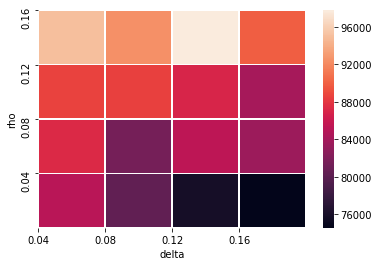

In [5]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(delta_values)))
ax.set_yticks(np.arange(len(rho_values)))
ax.set_xticklabels(np.round(delta_values,2))
ax.set_yticklabels(np.flip(np.round(rho_values,2),axis=0))
ax.set_xlabel('delta')
ax.set_ylabel('rho')
plt.show()

## Hyperparameters: ants vs. rho / delta values

In [6]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [7]:
update_values = np.arange(0.04, 0.2, 0.04)
numbers_of_ants = [1, 5, 10 ,15]
best_scores_1 = np.zeros(shape=(update_values.shape[0], len(numbers_of_ants)))
runs_per_config = 5

for i, update_value in enumerate(update_values):
    for j, ants in enumerate(numbers_of_ants):
        evaporator = Evaporator(rho=update_value)
        intensifier = Intensifier(delta=update_value)
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic,
                                            problem=problem, parallel=True)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_1[i,j] += aco.best_score
        best_scores_1[i,j] /= runs_per_config
        print('ants: %d, rho / delta: %f, score: %d' % (ants, update_value, best_scores_1[i,j]))

ants: 1, rho / delta: 0.040000, score: 100062
ants: 5, rho / delta: 0.040000, score: 85676
ants: 10, rho / delta: 0.040000, score: 78760
ants: 15, rho / delta: 0.040000, score: 77868
ants: 1, rho / delta: 0.080000, score: 98427
ants: 5, rho / delta: 0.080000, score: 87109
ants: 10, rho / delta: 0.080000, score: 81518
ants: 15, rho / delta: 0.080000, score: 84387
ants: 1, rho / delta: 0.120000, score: 101966
ants: 5, rho / delta: 0.120000, score: 90684
ants: 10, rho / delta: 0.120000, score: 88599
ants: 15, rho / delta: 0.120000, score: 82317
ants: 1, rho / delta: 0.160000, score: 111052
ants: 5, rho / delta: 0.160000, score: 88689
ants: 10, rho / delta: 0.160000, score: 89766
ants: 15, rho / delta: 0.160000, score: 85561


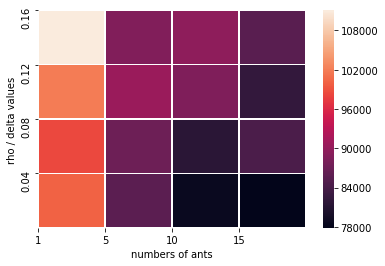

In [8]:
ax = sns.heatmap(np.flip(best_scores_1,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(update_values)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(update_values,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('rho / delta values')
plt.show()

## Hyperparameters: ants vs. considered number of solutions

In [9]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [10]:
numbers_of_solutions = [1, 2, 3]
numbers_of_ants = [5, 10 ,15]
best_scores_2 = np.zeros(shape=(len(numbers_of_solutions), len(numbers_of_ants)))
runs_per_config = 5

for i, number_of_solutions in enumerate(numbers_of_solutions):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic,
                                                    problem=problem, parallel=True)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator,
                                       number_of_solutions, True, False)
            solutions, scores = aco.run()
            best_scores_2[i,j] += aco.best_score
        best_scores_2[i,j] /= runs_per_config
        print('ants: %d, considered solutions: %d, score: %d' % (ants, number_of_solutions, best_scores_2[i,j]))

ants: 5, considered solutions: 1, score: 84168
ants: 10, considered solutions: 1, score: 76914
ants: 15, considered solutions: 1, score: 83649
ants: 5, considered solutions: 2, score: 68428
ants: 10, considered solutions: 2, score: 65563
ants: 15, considered solutions: 2, score: 65206
ants: 5, considered solutions: 3, score: 67136
ants: 10, considered solutions: 3, score: 65394
ants: 15, considered solutions: 3, score: 64555


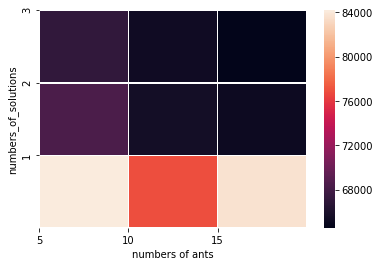

In [11]:
ax = sns.heatmap(np.flip(best_scores_2,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(numbers_of_solutions)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(numbers_of_solutions,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('numbers_of_solutions')
plt.show()

## Hyperparameters: with vs. without distance heuristic

In [12]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [13]:
heuristics = [TSPHeuristic, None]
numbers_of_ants = [1, 5, 10 ,15]
best_scores_3 = np.zeros(shape=(len(heuristics), len(numbers_of_ants)))
runs_per_config = 5

for i, heuristic in enumerate(heuristics):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=2, heuristic=heuristic,
                                                    problem=problem, parallel=True)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_3[i,j] += aco.best_score
        best_scores_3[i,j] /= runs_per_config
        print('ants: %d, heuristic: %s, score: %d' % (ants, heuristic, best_scores_3[i,j]))

ants: 1, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 95889
ants: 5, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 83995
ants: 10, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 80406
ants: 15, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 75420
ants: 1, heuristic: None, score: 298720
ants: 5, heuristic: None, score: 285933
ants: 10, heuristic: None, score: 267098
ants: 15, heuristic: None, score: 259941


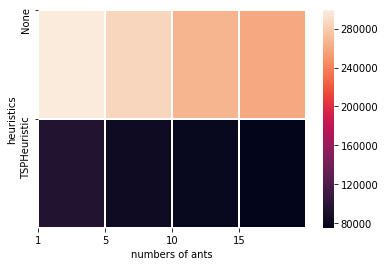

In [14]:
ax = sns.heatmap(np.flip(best_scores_3,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(heuristics)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(['TSPHeuristic', 'None'],axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('heuristics')
plt.show()

## Hyperparameters: alpha / beta weights 

In [15]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [27]:
values = np.arange(2, 14, 2)
best_scores_4 = np.zeros(shape=(len(values), len(values)))
runs_per_config = 5

for i, alpha in enumerate(values):
    for j, beta in enumerate(values):
        solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=alpha, beta=beta, heuristic=heuristic,
                                                    problem=problem, parallel=True)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=200), convergenceTerminator(maxIter=20)]
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            solutions, scores = aco.run()
            best_scores_4[i,j] += aco.best_score
        best_scores_4[i,j] /= runs_per_config
        print('alpha: %d, beta: %s, score: %d' % (alpha, beta, best_scores_4[i,j]))

alpha: 2, beta: 2, score: 87667
alpha: 2, beta: 4, score: 67449
alpha: 2, beta: 6, score: 64126
alpha: 2, beta: 8, score: 64771
alpha: 2, beta: 10, score: 63658
alpha: 2, beta: 12, score: 64857
alpha: 4, beta: 2, score: 88254
alpha: 4, beta: 4, score: 69134
alpha: 4, beta: 6, score: 66060
alpha: 4, beta: 8, score: 65062
alpha: 4, beta: 10, score: 65102
alpha: 4, beta: 12, score: 65509
alpha: 6, beta: 2, score: 91018
alpha: 6, beta: 4, score: 68439
alpha: 6, beta: 6, score: 64429
alpha: 6, beta: 8, score: 65570
alpha: 6, beta: 10, score: 65851
alpha: 6, beta: 12, score: 65224
alpha: 8, beta: 2, score: 96872
alpha: 8, beta: 4, score: 71269
alpha: 8, beta: 6, score: 68184
alpha: 8, beta: 8, score: 66337
alpha: 8, beta: 10, score: 65768
alpha: 8, beta: 12, score: 65991
alpha: 10, beta: 2, score: 95443
alpha: 10, beta: 4, score: 71485
alpha: 10, beta: 6, score: 66034
alpha: 10, beta: 8, score: 66330
alpha: 10, beta: 10, score: 66787
alpha: 10, beta: 12, score: 66096
alpha: 12, beta: 2, scor

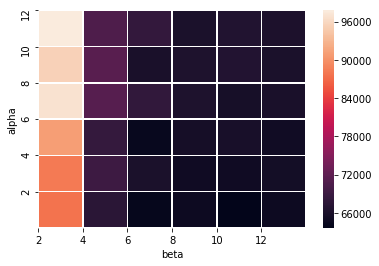

In [29]:
ax = sns.heatmap(np.flip(best_scores_4,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(values)))
ax.set_yticks(np.arange(len(values)))
ax.set_xticklabels(values)
ax.set_yticklabels(np.flip(values,axis=0))
ax.set_xlabel('beta')
ax.set_ylabel('alpha')
plt.show()

## Find ACO solution for problem 1

In [47]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=True)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_1, scores_1 = aco.run()

In [48]:
print('Best score for problem 1: ', scores_1[-1,0])

Best score for problem 1:  65808


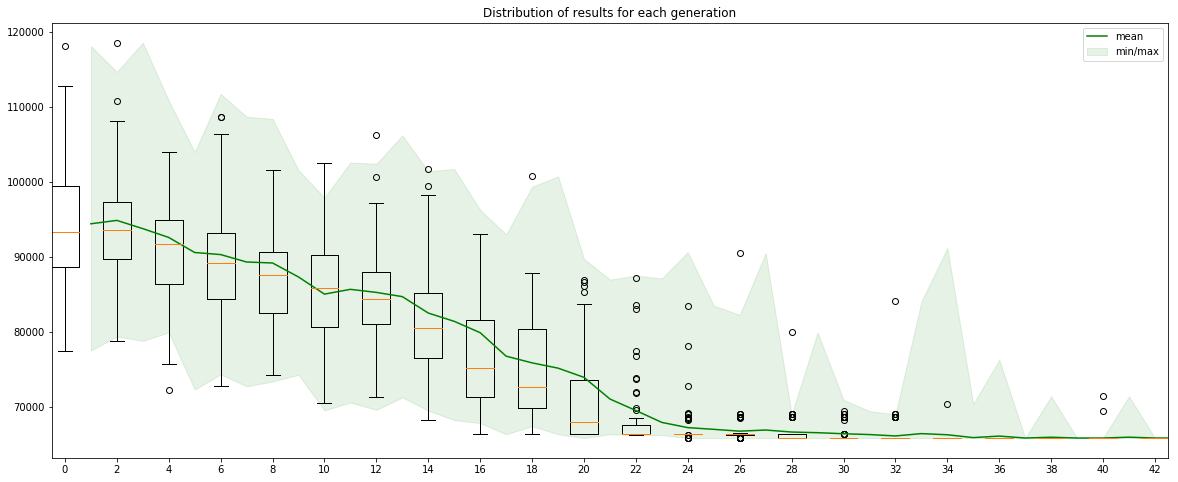

In [49]:
plot_evolution(scores_1, 20)

In [50]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=False)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_1, scores_1 = aco.run()

In [51]:
print('Best score for problem 1: ', scores_1[-1,0])

Best score for problem 1:  62532


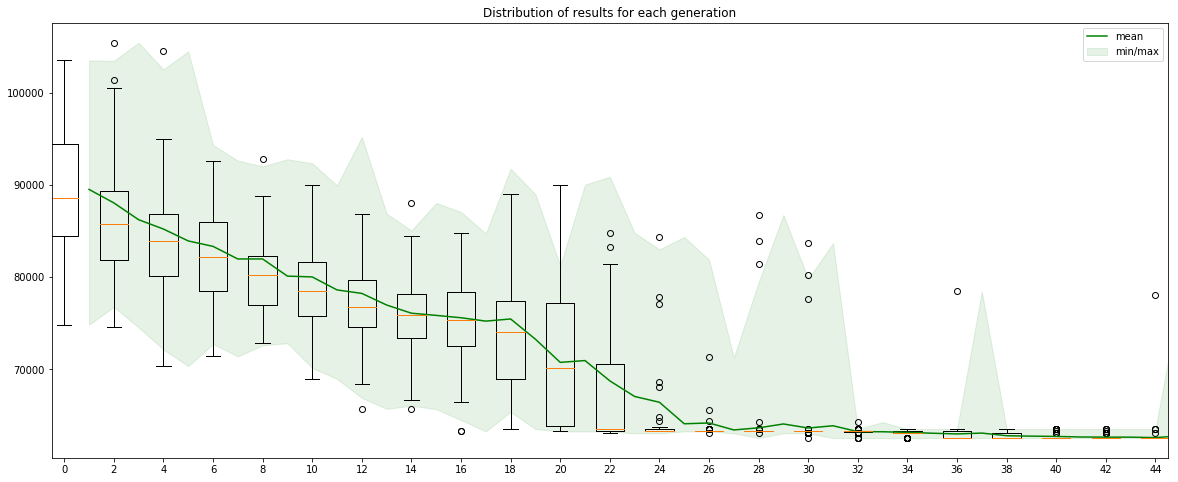

In [52]:
plot_evolution(scores_1, 20)

In [59]:
problem = VehicleRoutingProblem(problem=1, selection='sufficient', criterion='cost', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=False)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_1, scores_1 = aco.run()

In [60]:
print('Best score for problem 1: ', scores_1[-1,0])

Best score for problem 1:  94266


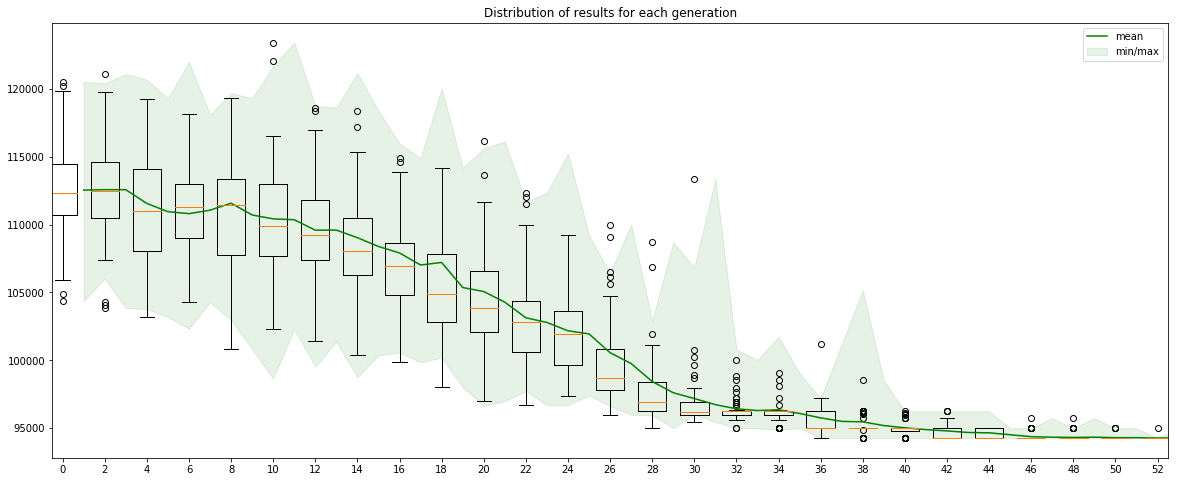

In [62]:
plot_evolution(scores_1, 20)

## Find ACO solution for problem 2

In [53]:
problem = VehicleRoutingProblem(problem=2, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=True)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_2, scores_2 = aco.run()

In [54]:
print('Best score for problem 2: ', scores_2[-1,0])

Best score for problem 2:  106229


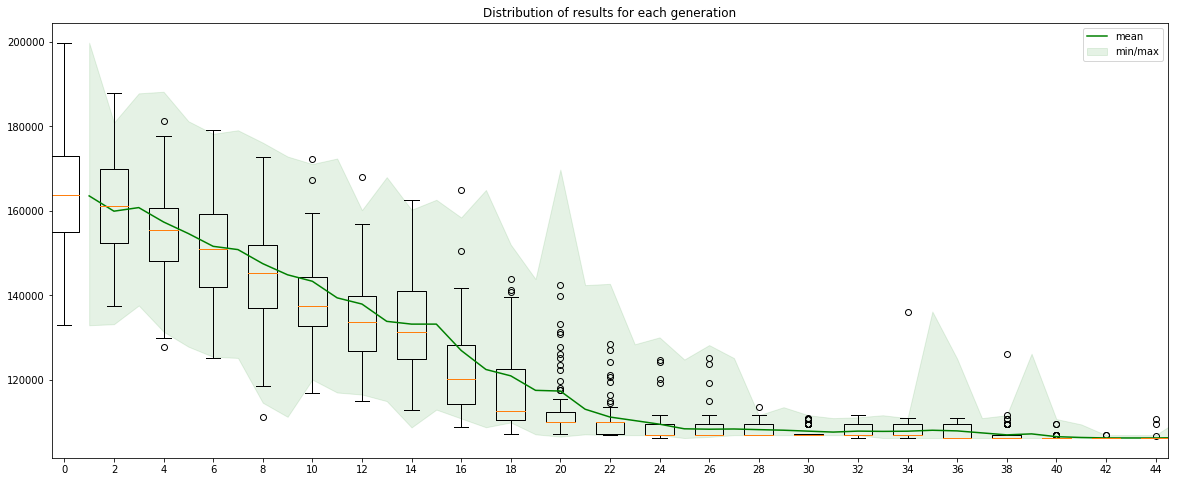

In [55]:
plot_evolution(scores_2, 20)

In [56]:
problem = VehicleRoutingProblem(problem=2, selection='sufficient', criterion='cost_per_item_and_capacity', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=False)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_2, scores_2 = aco.run()

In [57]:
print('Best score for problem 2: ', scores_2[-1,0])

Best score for problem 2:  104519


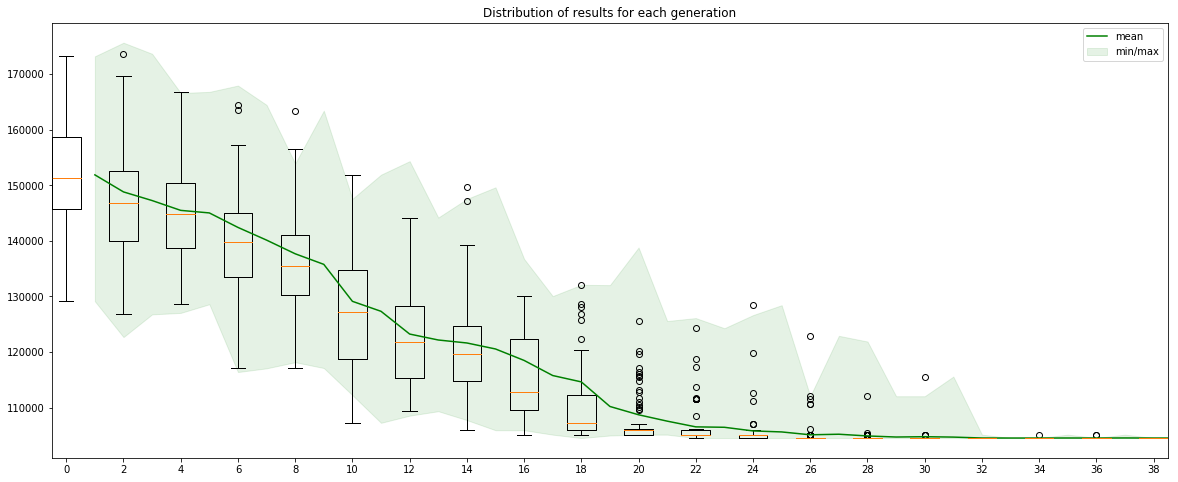

In [58]:
plot_evolution(scores_2, 20)

In [63]:
problem = VehicleRoutingProblem(problem=2, selection='sufficient', criterion='cost', objective='min')
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.1)
heuristic = TSPHeuristic

solution_gen = PermutationSolutionGenerator(number_of_ants=80, alpha=4, beta=4, heuristic=heuristic,
                                            problem=problem, parallel=False)
terminator = [maxItTerminator(maxIt=1000), convergenceTerminator(maxIter=20)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

solutions_2, scores_2 = aco.run()

In [64]:
print('Best score for problem 2: ', scores_2[-1,0])

Best score for problem 2:  103664


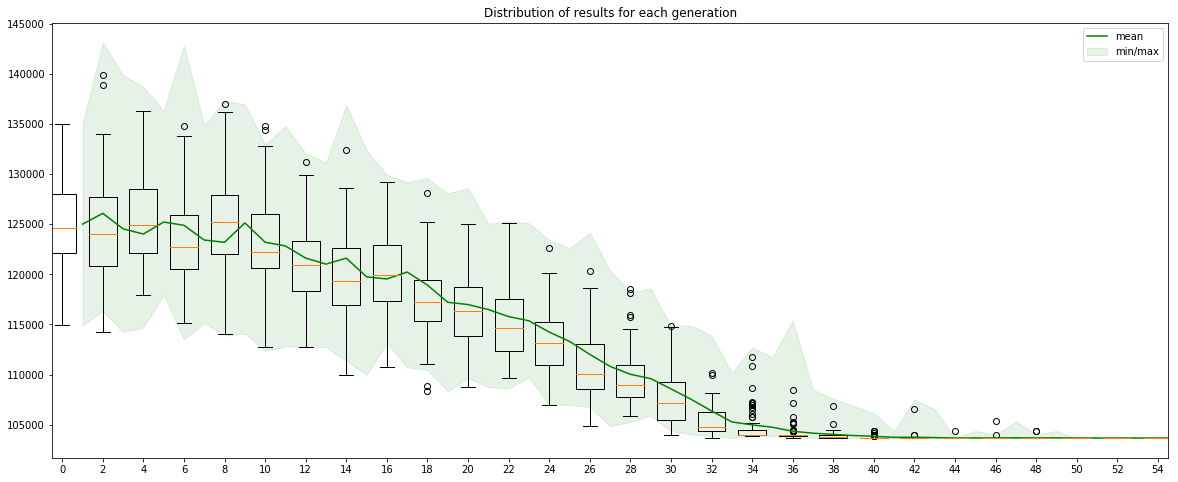

In [65]:
plot_evolution(scores_2, 20)